In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import common
## what the heck this do
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# The CNN

In [7]:
# Define the CNN
# Takes in a 3 channel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, padding=2) # Padding to preserve 32x32
        self.pool = nn.MaxPool2d(2, 2) # 16x16
        self.conv2 = nn.Conv2d(32, 64, 5, padding=2) # 16x16, max pool to 8x8
        self.conv3 = nn.Conv2d(64, 128, 5, padding=2) # 8x8, max pool to 4x4
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(128 * 4 * 4, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # dont flatten batch, a1
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        x = self.fc4(x)
        return x

net = Net()

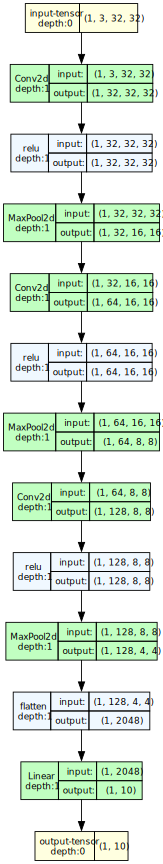

In [8]:
import torchvision
from torchview import draw_graph

# Get the shape of a single sample and add batch dimension
sample_image, _ = trainset[0]
input_shape = (1,) + sample_image.shape

# get on batch to see size
model_graph = draw_graph(net, input_size=input_shape, expand_nested=True)
model_graph.visual_graph

# The Tests

[1,   500] loss: 1.471
Epoch 1 - Train Acc: 0.6210, Val Acc: 0.5941
[2,   219] loss: 0.435
[2,   719] loss: 0.896
Epoch 2 - Train Acc: 0.7300, Val Acc: 0.6782
[3,   438] loss: 0.649
Epoch 3 - Train Acc: 0.7967, Val Acc: 0.7194
[4,   157] loss: 0.187
[4,   657] loss: 0.623
Epoch 4 - Train Acc: 0.8267, Val Acc: 0.7248
[5,   376] loss: 0.374
Epoch 5 - Train Acc: 0.8666, Val Acc: 0.7340
[6,    95] loss: 0.070
[6,   595] loss: 0.424
Epoch 6 - Train Acc: 0.8941, Val Acc: 0.7389


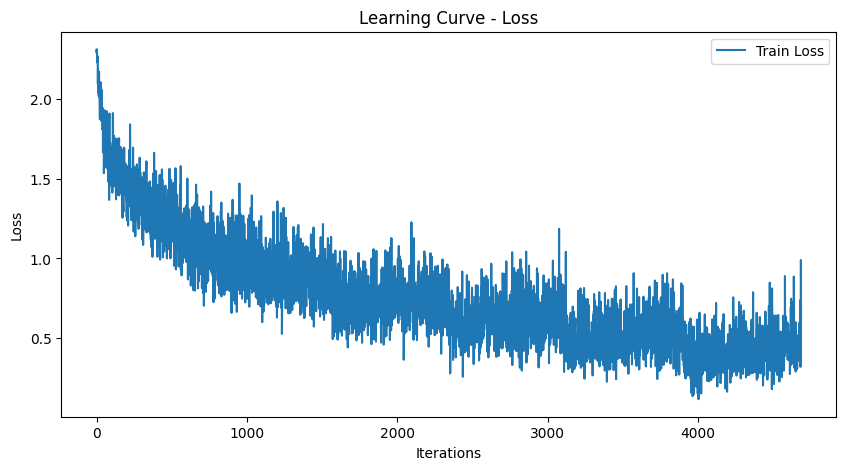

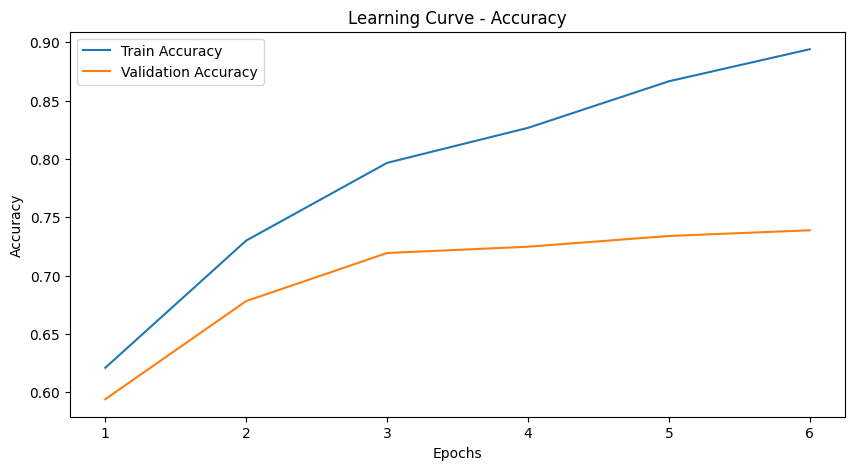

Final Training Accuracy: 0.89406
Final Validation Accuracy: 0.7389


In [9]:
model = Net()
common.train(model, trainset, testset, learning_rate=0.001, optimizer="adam", num_epochs=6, batch_size=64)